# Introduction to Support Vector Machines
Gina Nguyen
Machine Learning Basics

# Implementing Support Vector Machines (SVMs) from Scratch
The following blocks of code will:
1. Implement a hinge loss function to train the model
2. Implement a subgradient descent algorithm and optmize the hinge loss for testing.
3. Compare the hinge loss function with sklearn's native SVM function.

## Equations for hinge loss in SVMs
Hinge Loss and penalty for overfitting: 
$ hinge \ loss = max(0, 1-y^m (w^Tx^m + b)) + min_{w,b}(1/2)(||w||^2) $ 

Note that in hinge loss, data is misclassified when its loss is less than 1 (in perceptrons, the misclassification occurs at the zero boundary).

Resources:
- https://towardsdatascience.com/a-definitive-explanation-to-hinge-loss-for-support-vector-machines-ab6d8d3178f1
- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
-https://datamonje.com/classification-loss-functions/
-https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

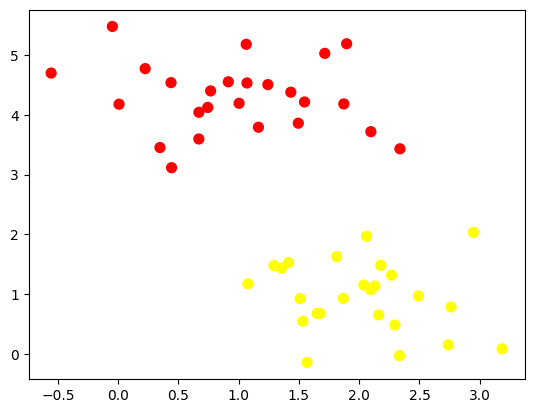

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#Using the make_blobs function to create the data set
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn');

#Splitting the dataset into a training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 5) #the same train/test split as in linear regression and perceptron

Training accuracy:  1.0
Testing accuracy:  0.9


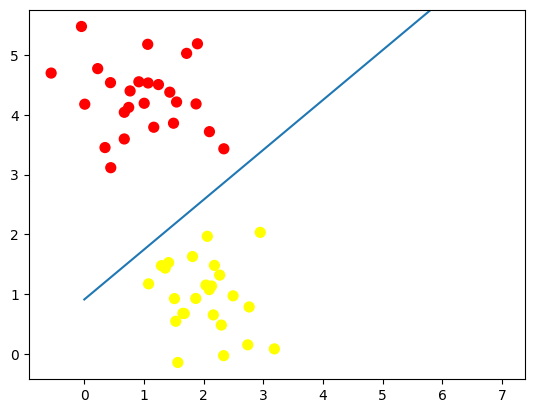

In [91]:
#Hinge Loss Function for SVM
L = 1
iterations = 100

def hinge_loss(y, y_pred):
    return np.maximum(0, 1-y*y_pred)
 
def support_vector_function():
    #Setting all the weights to 0
    wSVM = np.zeros(shape=(1, x_train.shape[1]+1))#remember that in the case of perceptron, the bias counts as a weight (therefore +1)

    #Keeping track of what is missclassified to make sure code is working
    misclassifiedSVM = []

    for i in range (iterations):
        misclassedSVM = 0
        D_wSVM = 0
        for x_i, label1 in zip(x_train, y_train): #This allows to to iterate through both x_train and y_train, so "label" is y_train
            label=label1
            if(label1==0): #changes 0 to -1
                label=-1 
            x_i = np.insert(x_i, 0, 1) #inserts 1 for the bias
            y_i = np.matmul(wSVM, x_i) #in this case, y_i represents the boundary
            if (hinge_loss(label, y_i)): #the if function, when the inside argument is not 0, assumes that its true
                #Adjusting the weight if the distance from the decision boundary is less than 1
                misclassedSVM += 1
                D_wSVM += -(x_i)*(label)
                
        wSVM -= L*(D_wSVM/(len(x_train)))     
        misclassifiedSVM.append(misclassedSVM)
        
    #print (misclassifiedSVM)
    return wSVM
            
wSVM = support_vector_function()

#Printing the accuracy score
from sklearn.metrics import accuracy_score

wSVM_nobias = wSVM[0][1:] #w with no bias, which I will use to check accuracy
def sign_func(value): #this step function is the s                                                                                                                                                            ubgradient descent
    return 1 if (value > 0) else 0
vector_step = np.vectorize(sign_func) #So that the step function is applied to every element in the array

#Training set:
y_predSVM = vector_step(np.matmul(x_train, np.transpose(wSVM_nobias))+wSVM[0][0])
print("Training accuracy: ", accuracy_score(y_train, y_predSVM))

#Training set:
y_predSVM = vector_step(np.matmul(x_test, np.transpose(wSVM_nobias)))
print("Testing accuracy: ", accuracy_score(y_test, y_predSVM))


#Showing the results on the scatterplot:
def plot_SVM(ax = None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_grid = np.linspace(xlim[0], xlim[1], 30)
    y_grid = np.linspace(ylim[0], ylim[1], 30)
    Y_grid, X_grid = np.meshgrid(y_grid, x_grid)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    x1 = np.linspace(0,7,50)
    x2 = -wSVM[0,1]*x1/wSVM[0,2] - wSVM[0,0]/wSVM[0,2]
    plt.plot(x1,x2)

    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_SVM()

Training accuracy:  1.0
Testing accuracy:  1.0


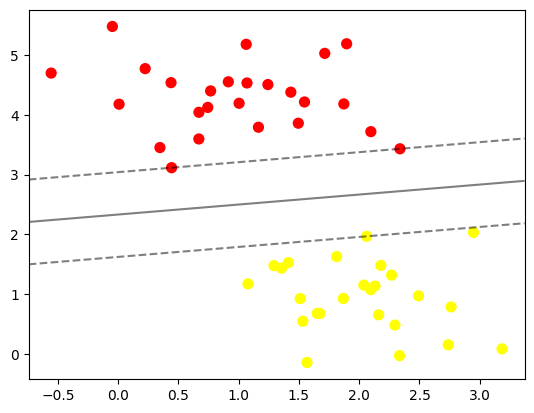

In [35]:
#Comparing with the SVM achieved by sklearn
from sklearn.svm import SVC # "Support vector classifier"
SVMmodel = SVC(kernel='linear', C=1E10)
SVMmodel.fit(x_train, y_train)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(SVMmodel)

print("Training accuracy: ", accuracy_score(y_train, SVMmodel.predict(x_train)))
print("Testing accuracy: ", accuracy_score(y_test, SVMmodel.predict(x_test)))


#### Comparing the SVM and perceptron
The SVM is noticably more centered that the perceptron that I implement. However, when comparing the self-implemented learning algorithms to the sklearn learning algorithms, both had the same training and testing accuracy yet seem to have different decision boundaries. This may be because the dataset is small and are clearly separable.